<a href="https://colab.research.google.com/github/MarleneChevalier/Optimisation/blob/master/Projet_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimisation : Regressions de Ridge et LASSO / Descente de gradient
====================================
Marlène Chevalier - Executive Master Statistique et Big Data

Juillet 2020 

Sujet :
====
Il s'agit d'un mini projet, sous forme d'un rapport expliquant les résultats obtenus à partir des méthodes d'optimisation vues en cours. Le package ScikitLearn ne devra pas être utilisé, sauf éventuellement pour vérifier les résultats obtenus.  
<http://scikit-learn.org/ Scikit-Learn>

**Les données choisies**  
Il s'agit de données concernant la consommation d'énergie dans un immeuble à basse consommation. Le fichier a été extrait de kaggle et vient de l'université de Mons (Belgique) : *KAG_energydata_complete.csv*.  
https://www.kaggle.com/loveall/appliances-energy-prediction  

Il est constitué de 19735 lignes qui constituent chacune un enregistrement de mesures faites entre janvier et mars 2016 sur 29 variables : 
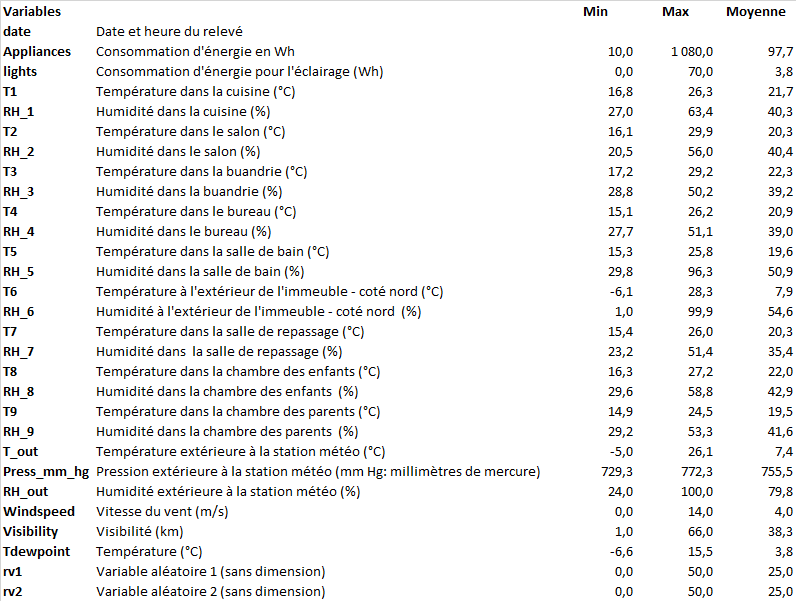   

Il n'y a pas de valeurs manquantes.


Librairies et fonctions utilisées
====================================
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sl

%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Fonctions pour convertir les vecteurs lignes et colonne.

In [2]:
#  convert to a column vector
def MakeCol(y): return y.reshape(-1,1)
#  convert to a row vector
def MakeRow(y): return y.reshape(1,-1)
# find non zero/true elements
def find(x): return np.nonzero(x)[0]

Préparation des données
---------------


In [3]:
#Fonction pour chargement via google collab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authentification Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Chargement de la base de données
id = '1FzqPcY8SVGV5etGI1rNM0bBc8n1btGGV'
downloaded = drive.CreateFile({'id': '1FzqPcY8SVGV5etGI1rNM0bBc8n1btGGV'})
downloaded.GetContentFile('KAG_energydata_complete.csv')


In [4]:
data_energy = pd.read_csv('KAG_energydata_complete.csv')

Distribution de la consommation électrique

97.6949581960983
102.52229296483686
[  10.   50.   60.  100. 1080.]


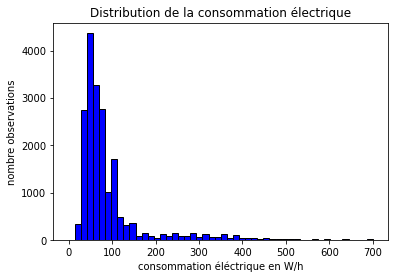

In [5]:
plt.hist(data_energy['Appliances'], range = (0, 700), bins = 50, color = 'blue',
            edgecolor = 'black')
plt.xlabel('consommation éléctrique en W/h')
plt.ylabel('nombre observations')
plt.title('Distribution de la consommation électrique')
print(np.mean(data_energy['Appliances']))
print(np.std(data_energy['Appliances']))
print(np.quantile(data_energy['Appliances'], [0, 0.25, 0.5, 0.75, 1]))

La consommation éléctrique est fortement concentrée entre 30 et 80 Wh, avec une valeur médiane à 60Wh.

Corrélation des variables du jeu de données

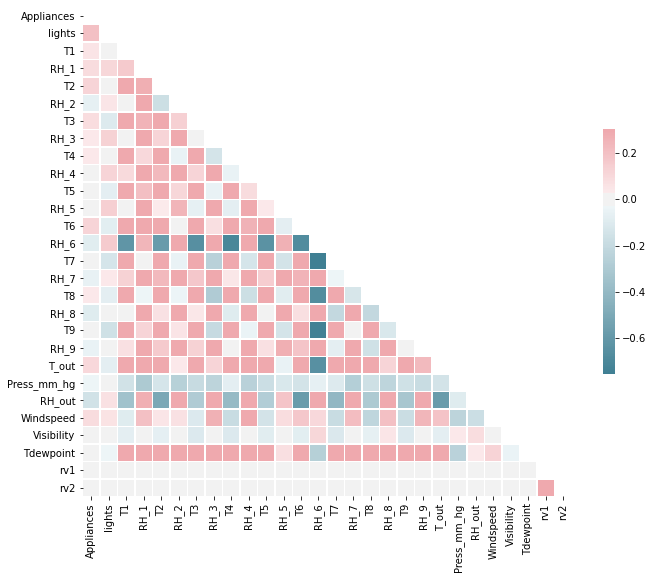

In [6]:
# Calcul des corrélations
corr = data_energy.corr()
# Masque triangle du graphique
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Parametres graphique
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Tracé du graphe
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Il apparait de fortes corrélations : 
* entre les taux d'humidité extérieur et les mesures de température (RHT et T1 à T9): corrélations négatives 
* entre les températures entre elles (T1 à T9) : corrélation positive  
* entre la mesure de température (Tdewpoint) et les autres températures ainsi que les taux d'humidité

Aucune corrélation entre les variables aléatoires rv1 et rv2 et le reste des variables.

Séparer le jeu de données en un jeu d'apprentissage et un jeu de test

In [7]:
from sklearn.model_selection import train_test_split
# Générer l'ens de training. Fixer random_state pour répliquer les resultats ultérieurement.
train = data_energy.sample(frac=0.8, random_state=1)
# Sélectionner tout ce qui n'est pas dans le set de training et le mettre dans le set de test.
test = data_energy.loc[~data_energy.index.isin(train.index)]
# Afficher les dimensions des 2 sets.
print(train.shape)
print(test.shape)

(15788, 29)
(3947, 29)


Séparer les features $X$ de la variable à prédire $Y$ (Appliances).

In [8]:
[n,p] = data_energy.shape
print(n,p)
# separer la variable à prévoir (Y=Appliances) et des 28 variables predictives (X) 
#Y = data_energy['Appliances'] # variable reponse
Y_train = train['Appliances'] # variable reponse
Y_test = test['Appliances'] # variable reponse
print(Y_train.shape)
print(Y_test.shape)

X = data_energy 
X_train = train 
X_test = test
X_train.drop(['Appliances', 'date', 'rv1','rv2'], axis=1,inplace=True) # variables features training
X_test.drop(['Appliances', 'date', 'rv1','rv2'], axis=1,inplace=True) # variables features test
print(X_train.shape)
print(X_test.shape)

19735 29
(15788,)
(3947,)
(15788, 25)
(3947, 25)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Normalisation des variables features par la moyenne et l'écart type de l'ensemble d'apprentissage. 

In [9]:
mX_train = X_train.mean(axis=0)
sX_train = X_train.std(axis=0)
X_train = (X_train-mX_train)/sX_train
X_test= (X_test-mX_train)/sX_train
print(X_train )
print(X_test )


         lights        T1      RH_1  ...  Windspeed  Visibility  Tdewpoint
343   -0.477594 -1.700812  0.454964  ...   0.459769   -0.705808  -0.499086
13136  2.047607  0.563887  0.860538  ...  -0.016453    0.142330   0.734342
19315 -0.477594  1.871641  0.116145  ...   0.731896   -0.861300   0.770036
4706  -0.477594 -1.039669 -0.148361  ...  -0.696770   -1.412590  -0.875857
5322  -0.477594 -0.432498 -1.635888  ...  -0.832833   -1.384319  -1.232798
...         ...       ...       ...  ...        ...         ...        ...
11551 -0.477594  0.682207 -0.348629  ...  -0.084485   -0.069705   0.048223
13986 -0.477594  0.713344 -0.058933  ...  -0.424643    0.142330  -0.304752
1663  -0.477594 -2.742864  0.734583  ...  -0.016453   -2.062829   0.496382
11509 -0.477594 -0.307950 -0.222674  ...   0.051579   -0.705808   0.282217
14146 -0.477594 -0.058853 -0.761761  ...  -0.832833    0.142330  -0.677557

[15788 rows x 25 columns]
         lights        T1      RH_1  ...  Windspeed  Visibility  Tdewpoin

Remove the mean (computed from the *test* set) to avoid introducing a bias term and a constant regressor.
This is optional.

In [10]:
mY_train = Y_train.mean()
sY_train = Y_train.std()
Y_train = (Y_train-mY_train)/sY_train 
Y_test = (Y_test-mY_train)/sY_train 

Analyse des composantes principales
-------------------------------
Il s'agit de reduire la dimension des données en faisant une projection lineaire orthogonale des données sur les axes principaux selon la matrice de covariance.  
Calculons d'abord la matrice de covariance sur l'ensemble d'apprentissage.

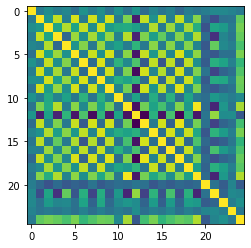

In [11]:
C = X_train.transpose().dot(X_train)
plt.imshow(C);

In [12]:
p = 25
u = X_train.transpose().dot(Y_train)
plt.clf
plt.bar(np.arange(1,p+1),u.flatten())
plt.axis('tight')

AttributeError: ignored

Base orthogonale de l'ACP et variables dans cette base.  
Racines des valeurs propres

In [16]:
U, s, V = np.linalg.svd(X_train)
X_train_r = X_train.dot( V.transpose() )

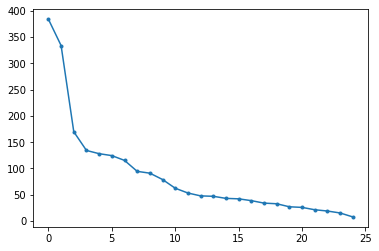

In [15]:
plt.plot(s, '.-');

Display the features.

TypeError: ignored

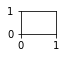

In [ ]:
pmax = min(p,8)
k = 0
plt.clf
for i in np.arange(0,pmax):
    for j in np.arange(0,pmax):
        k = k+1
        plt.subplot(pmax,pmax,k)
        if i==j:
            plt.hist(X_train[:,i],6)
            plt.axis('tight')
        else:
            plt.plot(X_train[:,j],X_train[:,i], '.')
        plt.axis('tight')
        if i==1:
            plt.title(class_names[0][j][0])
        plt.tick_params(axis='x', labelbottom=False)
        plt.tick_params(axis='y', labelleft=False)

Display the points cloud of feature vectors in 2-D PCA space.

In [ ]:
plt.plot(X_train_r[:,0], X_train_r[:,1], '.')
plt.axis('equal');

TypeError: ignored

1D plot of the function to regress along the main eigenvector axes.

TypeError: ignored

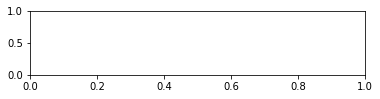

In [ ]:
plt.clf
for i in np.arange(0,3):
    plt.subplot(3,1,i+1)
    plt.plot(X_train_r[:,i], Y_train, '.')
    plt.axis('tight')

Regression Linéaire
-----------------
Soit la relation linéaire entre les variables du jeu de données
  $ Y_i = \dotp{w}{x_i} $
ou sous forme matricielle
  $ Y= X w $ .  
  avec $ Y :  $ vecteur de la variable consommation électrique   
  et  $ X :  $ matrice des covariables explicatives  
  n : nombre d'observations et p nombre total de variables 

Lorsque $ n > p $, le système peut se résoudre en utilisant les moindres carrés  :
  $$ \umin{ w }  \norm{Xw-Y}^2 $$
la solution des MCO est :
  $$ w = (X^\top X)^{-1} X^\top y $$


In [18]:
w = np.linalg.solve( X_train.transpose().dot(X_train), X_train.transpose().dot(Y_train) )

Graphique consommation électrique : Prevision / Vraie valeur 

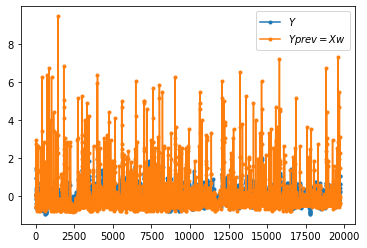

In [24]:
plt.clf
plt.plot( X_test.dot(w), '.-' )
plt.plot( Y_test, '.-' )
plt.axis('tight')
plt.legend(('$Y$', '$Yprev = $$X w$'));

Il apparait que la prédiction de la consommation électrique (Yprev) semble plus fluctuante que la vraie consommation.

L'erreur de prévision évaluée sur l'ensemble de test est :

In [20]:
E = np.linalg.norm(X_test.dot(w)-Y_test) / np.linalg.norm(Y_test)
print(( 'Erreur de prédiction relative : ' + str(E) ) );

Relative prediction error: 0.9226314020060525


Descente de gradient

La méthode de descente de gradient est souvent plus efficace pour résoudre ce type de problème . Il s'agit alors de minimiser la fonction : 
$$ 
    \min_w J(w) = \frac{1}{2}\norm{X w-Y}^2.
$$

In [33]:
def J(w): return 1/2*np.linalg.norm(X_train.dot(w)-Y_train)**2

Le gradient de la fonction $J$ est :
$$
    \nabla J(w) = X^\top (X w - Y).
$$

In [35]:
def GradJ(w): return X_train.transpose().dot(X_train.dot(w)-Y_train)

The maxium step size allowable by the gradient descent is 
$$
    \tau \leq \tau_\max \eqdef \frac{2}{\norm{XX^\top}_{op}}
$$
where $\norm{\cdot}_{op}$ is the maximum singular eigenvalue.

In [36]:
tau = 1/np.linalg.norm(X_train,2)**2

Initialize the algorithm to $w=0$.

In [37]:
w = np.zeros((p,1))

One step of gradient descent reads:
$$  w \leftarrow w - \tau \nabla J(w). $$

In [38]:
w = w - tau*GradJ(w)

In [39]:
tau_mult = [.1, .5, 1, 1.8]

__Exercise 0__

Display the evolution of the training error $J(w)$ as a function of the number of iterations.
Test for diffetent values of $\tau$.

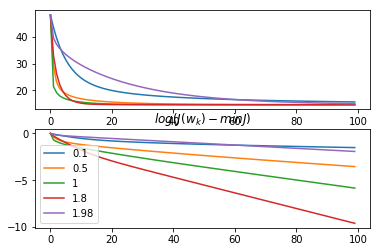

In [ ]:
run -i nt_solutions/ml_2_regression/exo0


Régularisation Ridge
=======

Regularization is obtained by introducing a penalty. It is often called
ridge regression, and is defined as
  $$ \umin{ w }  \norm{Xw-y}^2 + \lambda \norm{w}^2 $$
where $\lambda>0$ is the regularization parameter.


The solution is given using the following equivalent formula
  $$ w = (X^\top X + \lambda \text{Id}_p )^{-1} X^\top y, $$
  $$ w = X^\top ( XX^\top + \lambda \text{Id}_n)^{-1} y, $$
When $p<n$ (which is the case here), the first formula should be
prefered.


In contrast, when the dimensionality $p$ of the feature is very
large and there is little data, the second is faster. Furthermore, this
second expression is generalizable to Kernel Hilbert space setting,
corresponding possibly to $p=+\infty$ for some kernels.

In [ ]:
Lambda = .2*np.linalg.norm(X0)**2;
w = np.linalg.solve( X0.transpose().dot(X0) + Lambda*np.eye(p), X0.transpose().dot(y0) )
u = np.linalg.solve( X0.dot(X0.transpose()) + Lambda*np.eye(n0), y0 )
w1 = X0.transpose().dot( u )
print( ('Error (should be 0): ' + str( np.linalg.norm(w-w1)/np.linalg.norm(w) ) ) )

Error (should be 0): 3.856138917165329e-16


__Exercise 1__

Display the evolution of the test error $E$ as a function of $\lambda$.

Ridge: 67.90672125664283%


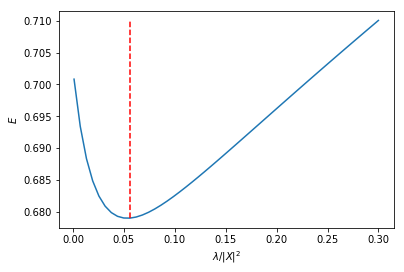

In [ ]:
run -i nt_solutions/ml_2_regression/exo1

In [ ]:
## Insert your code here.

__Exercise 2__

Display the regularization path, i.e. the evolution of $w$ as a function
of $\lambda$.

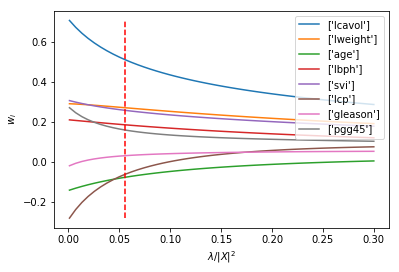

In [ ]:
run -i nt_solutions/ml_2_regression/exo2

In [ ]:
## Insert your code here.

Regularisation LASSO
---------------------
In order to perform feature selection (i.e. select a subsect of the
features which are the most predictive), one needs to replace the
$\ell^2$ regularization penalty by a sparsity inducing regularizer. The
most well known is the $\ell^1$ norm
$$ \norm{w}_1 \eqdef \sum_i \abs{w_i} . $$


The energy to minimize is
$$ \umin{w} J(w) \eqdef \frac{1}{2}\norm{X w-y}^2 + \lambda \norm{w}_1. $$

In [ ]:
def J(w,Lambda): return 1/2*np.linalg.norm(X0.dot(w)-y0)**2 + Lambda*np.linalg.norm(w,1)

The simplest iterative algorithm to perform the minimization is the
so-called iterative soft thresholding (ISTA), aka proximal gradient aka
forward-backward.


It performs first a gradient step (forward) of the smooth part $\frac{1}{2}\norm{X w-y}^2$ of the
functional and then a proximal step (backward) step which account for the
$\ell^1$ penalty and induce sparsity. This proximal step is the soft-thresholding operator
$$ \Ss_s(x) \eqdef \max( \abs{x}-\lambda,0 ) \text{sign}(x).  $$

In [ ]:
def Soft(x,s): return np.maximum( abs(x)-s, np.zeros(x.shape)  ) * np.sign(x)

The ISTA algorithm reads
$$ w_{k+1} \eqdef \Ss_{\la\tau}( w_k - \tau X^\top ( X w_k - y )  ), $$
where, to ensure convergence, the step size should verify $ 0 < \tau <
2/\norm{X}^2  $ where $\norm{X}$ is the operator norm.


Display the soft thresholding operator.

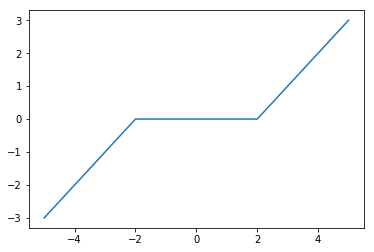

In [ ]:
t = np.linspace(-5,5,201)
plt.clf
plt.plot(t,Soft(t,2)) 
plt.axis('tight');

Descent step size.

In [ ]:
tau = 1.5/np.linalg.norm(X0,2)**2

Choose a regularization parameter $\la$.

In [ ]:
lmax = abs( X0.transpose().dot(y0) ).max()
Lambda = lmax /10

Initialization $w_0$.

In [ ]:
w = np.zeros((p,1))

A single ISTA step.

In [ ]:
C = X0.transpose().dot(X0)
u = X0.transpose().dot(y0)
def ISTA(w,Lambda,tau): return Soft( w-tau*( C.dot(w)-u ), Lambda*tau )
w = ISTA(w,Lambda,tau)

__Exercise 3__

Implement the ISTA algorithm, display the convergence of the energy.

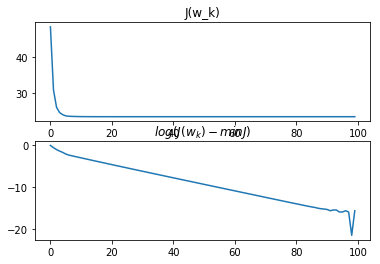

In [ ]:
run -i nt_solutions/ml_2_regression/exo3

In [ ]:
## Insert your code here.

__Exercise 4__

Compute the test error along the full regularization path. You can start by large $\lambda$ and use a warm restart procedure
to reduce the computation time. Compute the classification error.
ind optimal lambda
isplay error evolution.

Lasso: 65.42184378732037%


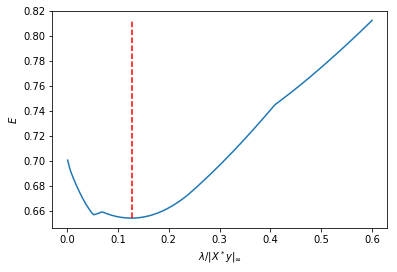

In [ ]:
run -i nt_solutions/ml_2_regression/exo4

In [ ]:
## Insert your code here.

__Exercise 5__

Display the regularization path, i.e. the evolution of $w$ as a function
of $\lambda$.
lot(lambda_list, W', 'LineWidth', 2);

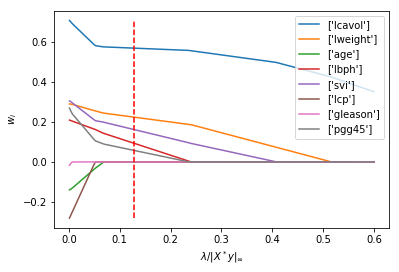

In [ ]:
run -i nt_solutions/ml_2_regression/exo5

In [ ]:
## Insert your code here.

__Exercise 6__

Compare the optimal weights for ridge and lasso.

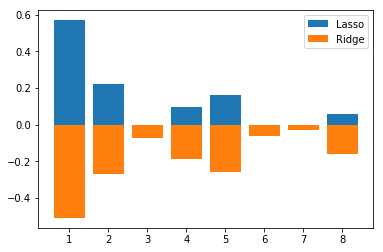

In [ ]:
run -i nt_solutions/ml_2_regression/exo8

<script>
  $(document).ready(function(){
      $('div.prompt').hide();
  });
</script>

<script>
  $(document).ready(function(){
      $('div.prompt').hide();
  });
</script>

Mesure de la performance

In [ ]:
require(Metrics)
#Il existe également le package MetricsWeighted pour considérer le poids de chaque ligne dans la mesure du risque et de la performance
metriques = function(segment,test_Y,pred)
{
    results = data.frame(
                    segment = segment,
                    precision = Metrics::precision(test_Y, ifelse(pred>mean(pred),1,0)),
                    recall = Metrics::recall(test_Y, pred),
                    auc = Metrics::auc(test_Y, pred),
                    logloss = LogLoss(test_Y,pred),
                    ratio = sum(pred)/sum(test_Y),
                    freq_y = mean(test_Y),
                    freq_pred = mean(pred)
                )
    return(results)
}